In [296]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches
import matplotlib.font_manager as font_manager
import matplotlib as mpl

In [297]:

font_dir = ['/Users/vivektiwari/Downloads/Poppins']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# Set font family globally
mpl.rcParams['font.family'] = 'Poppins'

In [298]:
#xG and xGA for each team from fbref
url = "https://fbref.com/en/comps/9/Premier-League-Stats"
df_fbref = pd.read_html(url)[0]
df_fbref = df_fbref.dropna(axis=1, how='all')
df_fbref = df_fbref.drop(['Attendance', 'Top Team Scorer', 'Goalkeeper'], axis=1)


In [299]:
df_fbref = df_fbref.iloc[::-1]

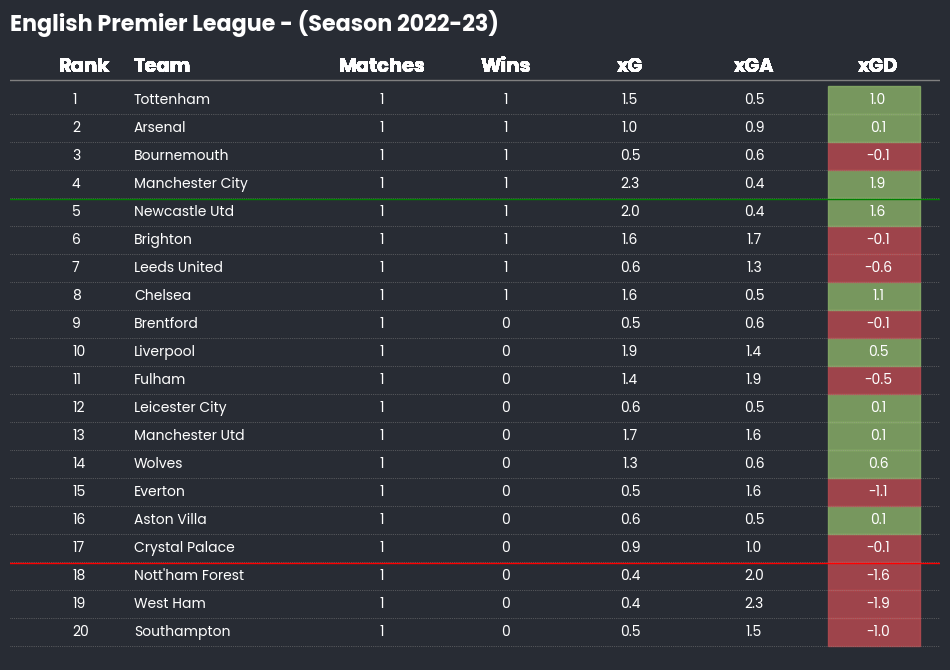

In [300]:
import themepy

theme = themepy.Theme()
(theme
.set_theme('neon')
.set_font('Poppins')
.set_pips(False)# we could set the tick marks on the x and y axis on or off here
.set_spines("off", which=["top","right","bottom","left"]) # we could show or hide the borders of the plot
.set_ticklabel_size() # we could change the size of the x and y tick labels here
.set_grid("off") # we could set the grid on or off and set params like color and linewidth
)


fig, ax = plt.subplots(figsize=(12, 8))

rows = 20
cols = 7

ax.set_ylim(-1, rows + 1)
ax.set_xlim(0, cols + .5)

for row in range(rows):
    ax.plot([0, cols + 1], [row -.5, row - .5], ls=':', lw='.5', c='grey')

# each key in the dict represents a column

for row in range(rows):
    d = df_fbref.iloc[row]


    ax.text(x =0.5, y = row, s=d['Rk'], va ='center', ha = 'left')
    ax.text(x=1, y=row, s=d['Squad'], va='center', ha='left')
    ax.text(x=3, y=row, s=d['MP'], va='center', ha='center')
    ax.text(x=4, y=row, s=d['W'], va='center', ha='center')
    ax.text(x=5, y=row, s=d['xG'], va='center', ha='center')
    ax.text(x=6, y=row, s=d['xGA'], va='center', ha='center')
    ax.text(x=7, y=row, s=d['xGD'], va='center', ha='center')


    ax.text(.6, 20.2, 'Rank', va='center', ha='center', fontsize=14, fontweight='bold')
    ax.text(1, 20.2, 'Team', va='center', ha='left', fontsize=14, fontweight='bold')
    ax.text(3, 20.2, 'Matches', va='center', ha='center', fontsize=14, fontweight='bold')
    ax.text(4, 20.2, 'Wins', va='center', ha='center', fontsize=14, fontweight='bold')
    ax.text(5, 20.2, 'xG', va='center', ha='center', fontsize=14, fontweight='bold')
    ax.text(6, 20.2, 'xGA', va='center', ha='center', fontsize=14, fontweight='bold')
    ax.text(7, 20.2, 'xGD', va='center', ha='center', fontsize=14, fontweight='bold')

    #line after first row
    if row == 19:
        ax.plot([0, cols + 1], [row + .7, row + .7], ls='-', lw='1', c='grey')
    
    if row == 15:
        ax.plot([0, cols + 1], [row + .45, row + .45], ls='-', lw='1', c='green')

    if row == 2:
        ax.plot([0, cols + 1], [row + .45, row + .45], ls='-', lw='1', c='red')


    #if xGD is negative, make it in red rectangle else make it in green rectangle
    if d['xGD'] < 0:
        ax.add_patch(patches.Rectangle((6.6, row - .5), 0.74, 1, fill=True, color='#bc4b51', alpha=0.8))
    else:
        ax.add_patch(patches.Rectangle((6.6, row - .5), 0.74, 1, fill=True, color='#8cb369', alpha=0.8))

    #x and y labels off
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

ax.set_title('English Premier League - (Season 2022-23)', fontsize=16, fontweight='bold', loc = 'left', pad = 10)

# save the figure
fig.savefig('fbref_plot.png', dpi=300, bbox_inches='tight')